## Loan Predicition


## EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train_ctrUa4K.csv")
test_data=pd.read_csv("test_lAUu6dG.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
train_data.shape,test_data.shape

((614, 13), (367, 12))

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_data.isna().sum()/len(train_data) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train_data["Loan_ID"].nunique()

614

**SUMMARY**
* Loan_ID has all unique number so we can skip this.

## Univariate analysis

In [14]:
# divide the data into numerical and category for univariate analysis 
category=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]
numerical=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [15]:
# for  univariate analysis-category variables
def UVA_category(data, category):
    size = len(category)
    rows = (size // 3) + 1  # Adjust the number of rows based on the number of categories
    cols = min(size, 3)  # Limit the number of columns to 3 for better readability

    plt.figure(figsize=(7 * cols, 5 * rows), dpi=100)

    # For every variable
    for j, i in enumerate(category):

        if data[i].isnull().sum() > 0:
            print(f"Warning: Column '{i}' contains missing values. Consider handling them during preprocessing.")

        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.barplot(x=norm_count.index, y=norm_count, order=norm_count.index)
        plt.xlabel(f'{i}', fontsize=20)
        plt.ylabel('fraction/percent', fontsize=20)
        plt.title(f'n_uniques = {n_uni} \n value counts \n {norm_count}')

    plt.tight_layout()
    plt.show()


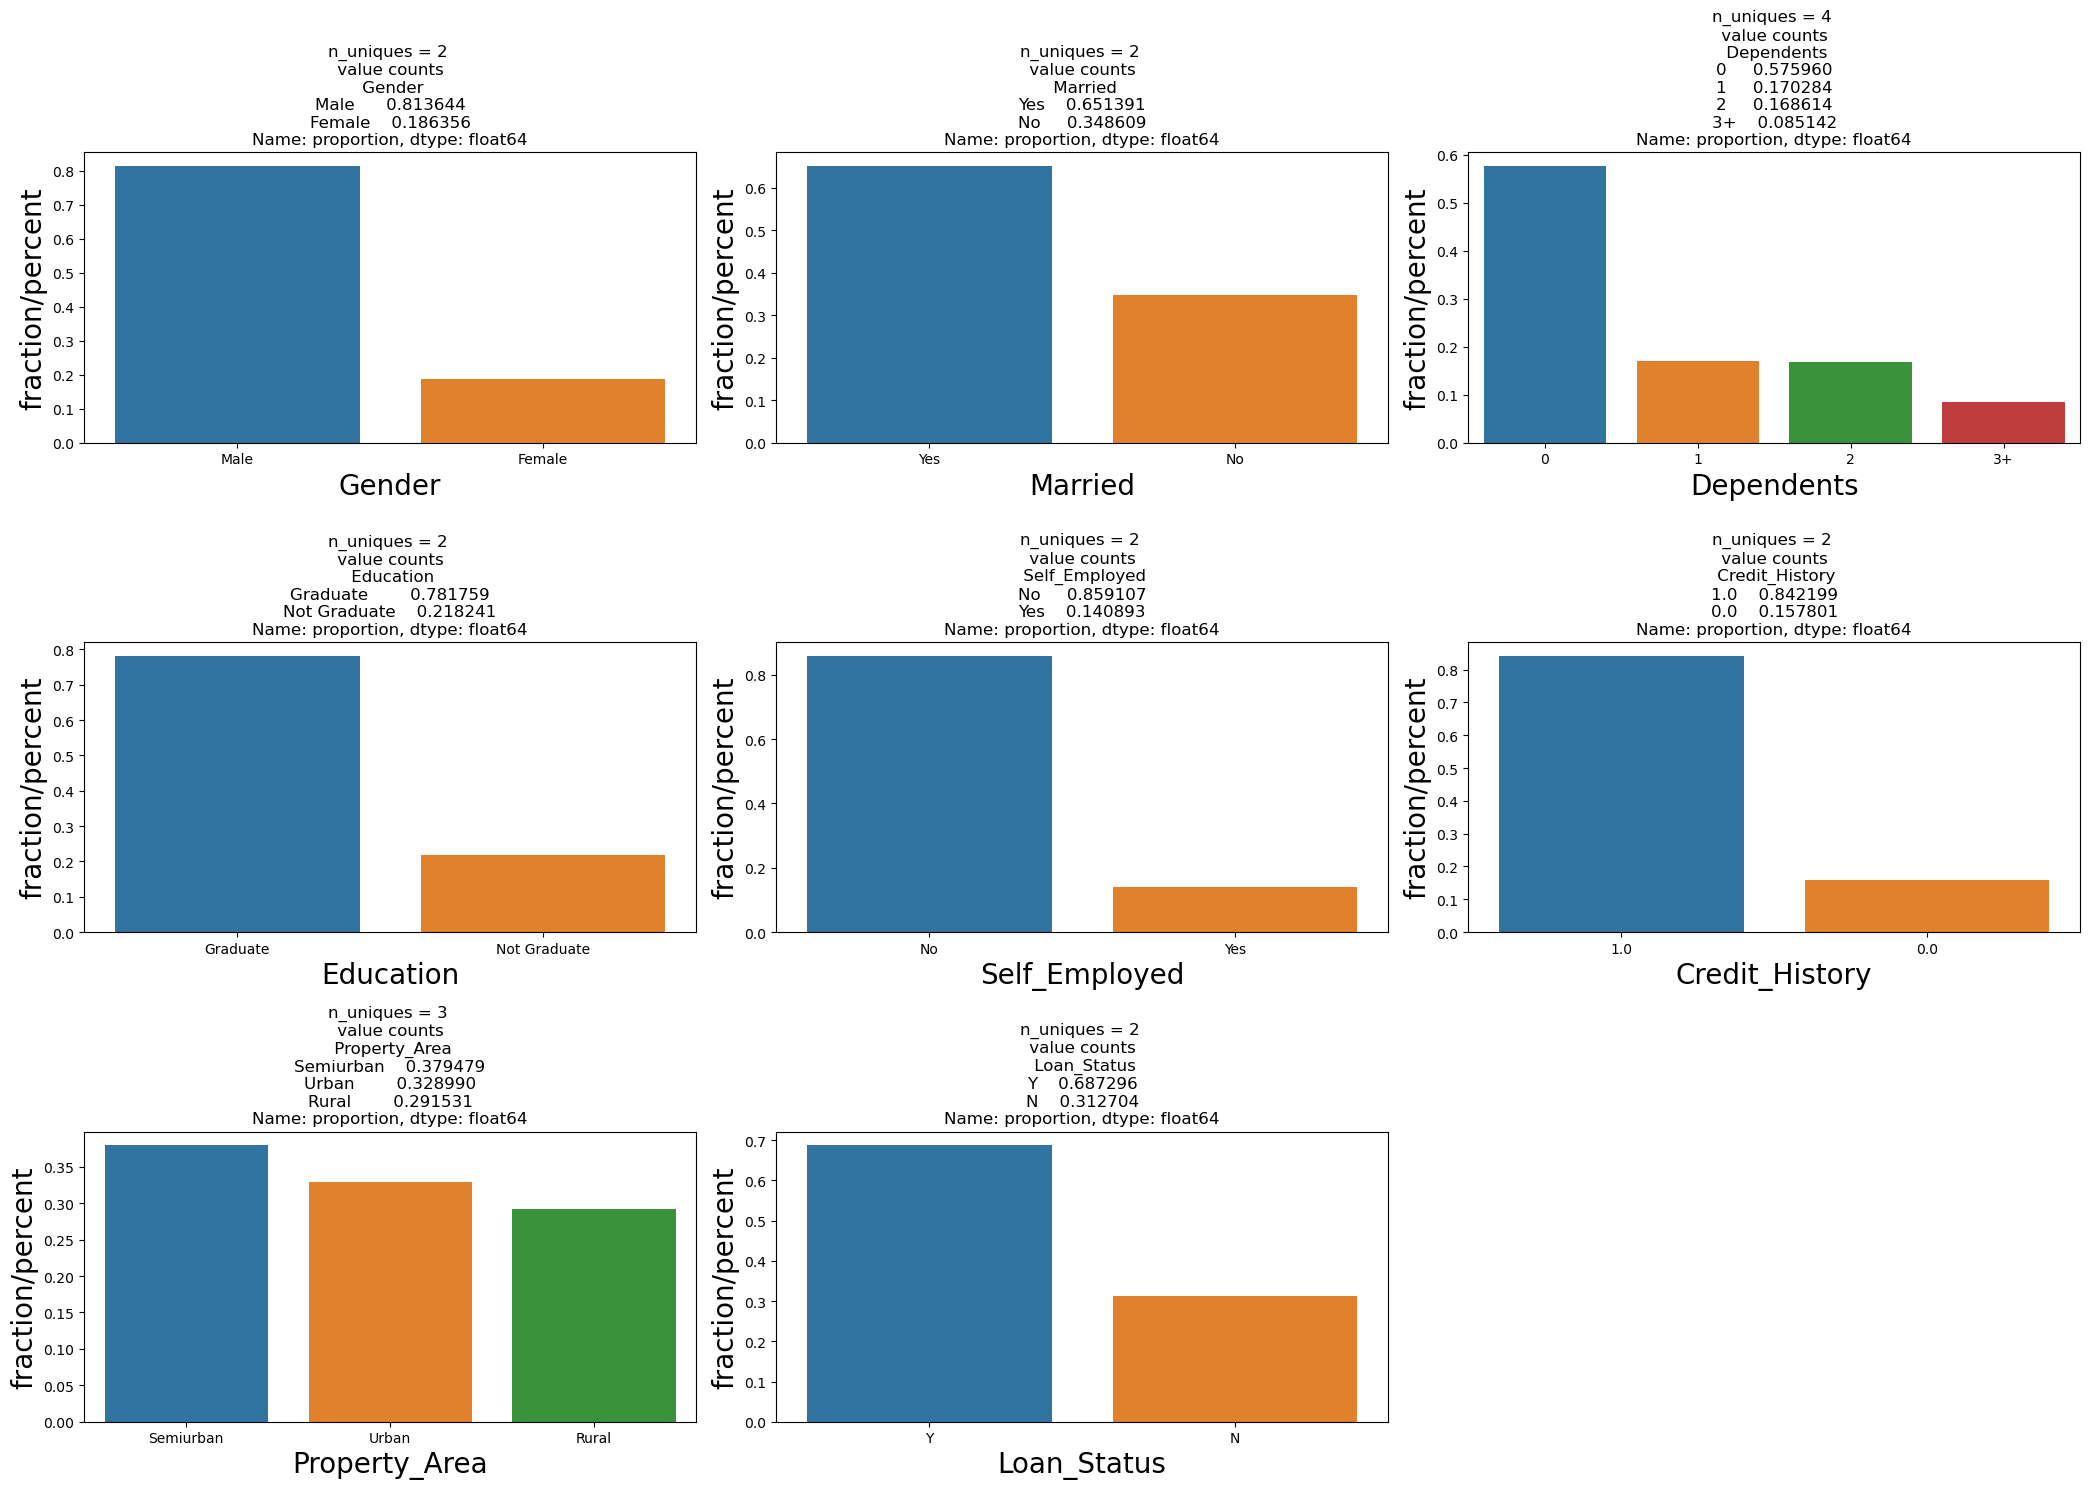

In [16]:
UVA_category(train_data, category)

In [17]:
def UVA_numeric(data, numerical):
    size = len(numerical)
    rows = (size // 3) + 1  # Adjust the number of rows based on the number of categories
    cols = min(size, 3)  # Limit the number of columns to 3 for better readability

    plt.figure(figsize=(7 * cols, 4*rows), dpi=100)

    # Looping for each variable
    for j, i in enumerate(numerical):
        # Calculating descriptives of a variable
        if data[i].isnull().sum() > 0:
            print(f"Warning: Column '{i}' contains missing values. Consider handling them during preprocessing.")

        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max() - data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # Calculating points for range of data within one standard deviation from mean
        points = round(mean - st_dev, 2), round(mean + st_dev, 2)

        # Plotting the variable with all the information
        ax = plt.subplot(rows, cols, j + 1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0, 0], color='black', label="within 1 std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label=f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color='red', label=f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color='blue', label=f"median={median}")
        
        # Lift x-axis up slightly
        ax.spines['bottom'].set_position(('outward', 10))  # Move x-axis upwards by 10 points
        
        plt.xlabel(f'{i}', fontsize=20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]}; kurtosis={kurt};\n skew = {skew}; range = {ran}')

    plt.tight_layout()
    plt.show()


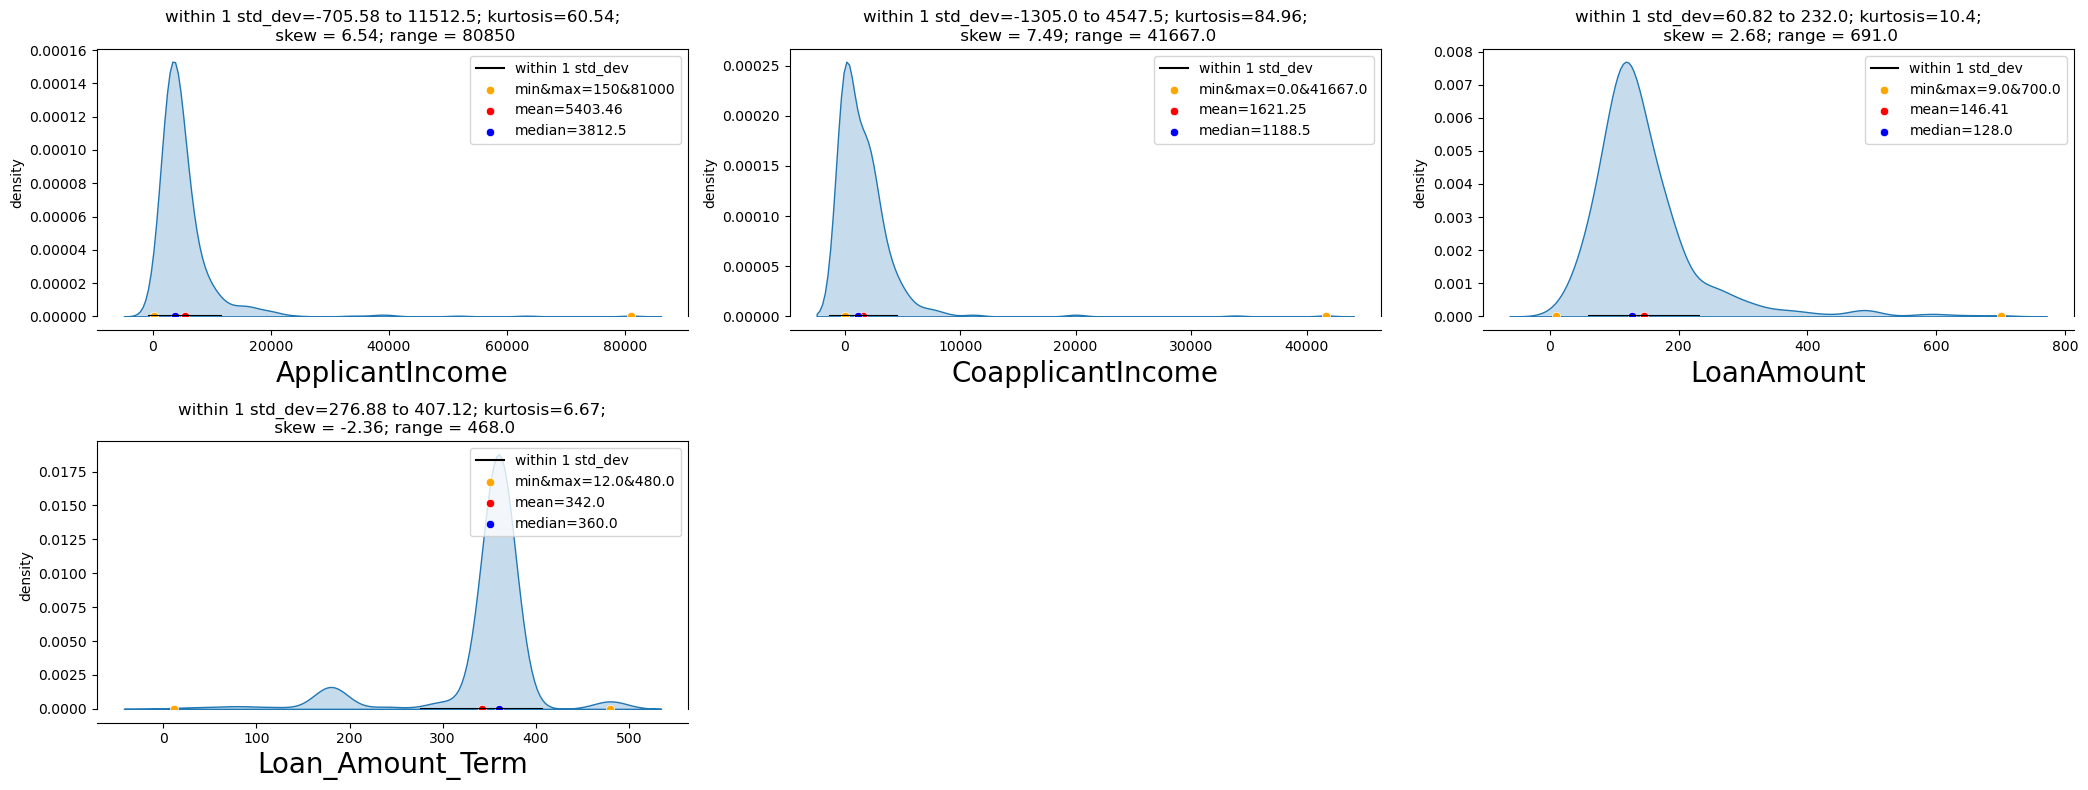

In [18]:
UVA_numeric(train_data, numerical)

* we can see outliers present in numerical cols

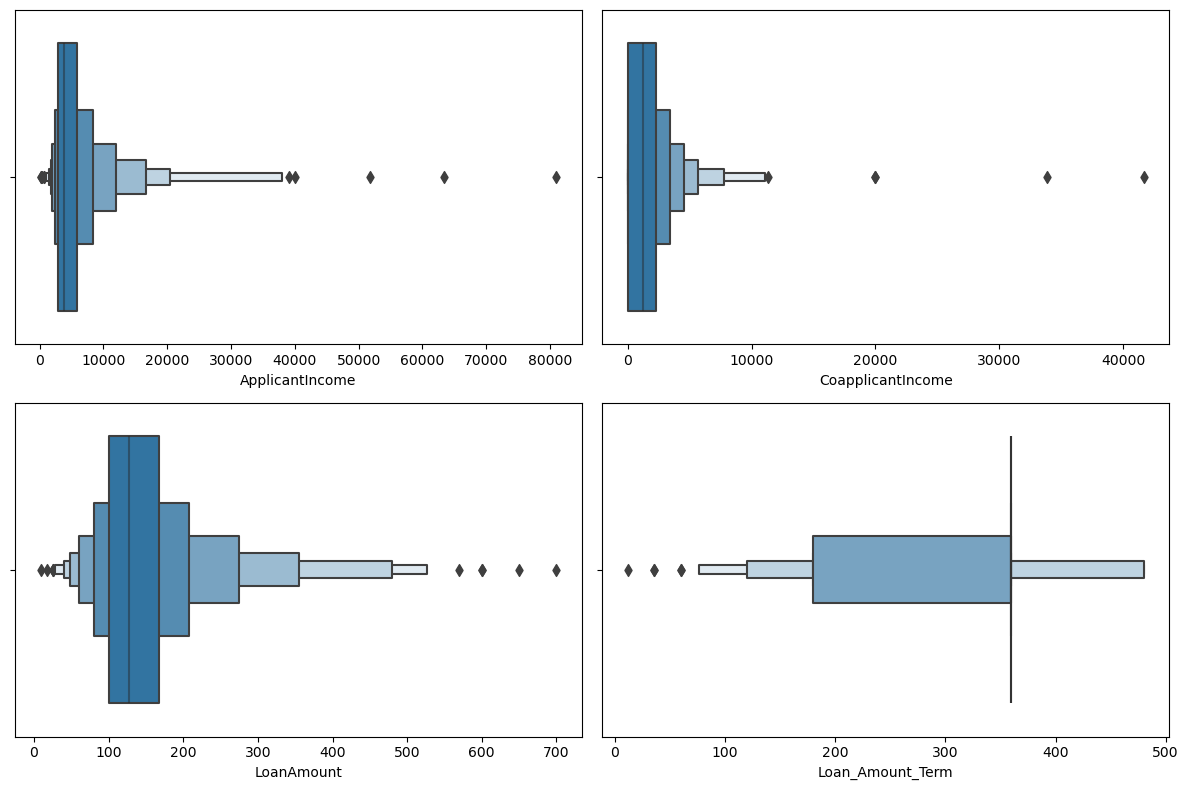

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.boxenplot(x=train_data[numerical[i]], ax=ax)
plt.tight_layout()

## Bivariate analysis

In [22]:
#converting Loan status into 1 for y and 0 for N
train_data['Loan_Status'] = train_data['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

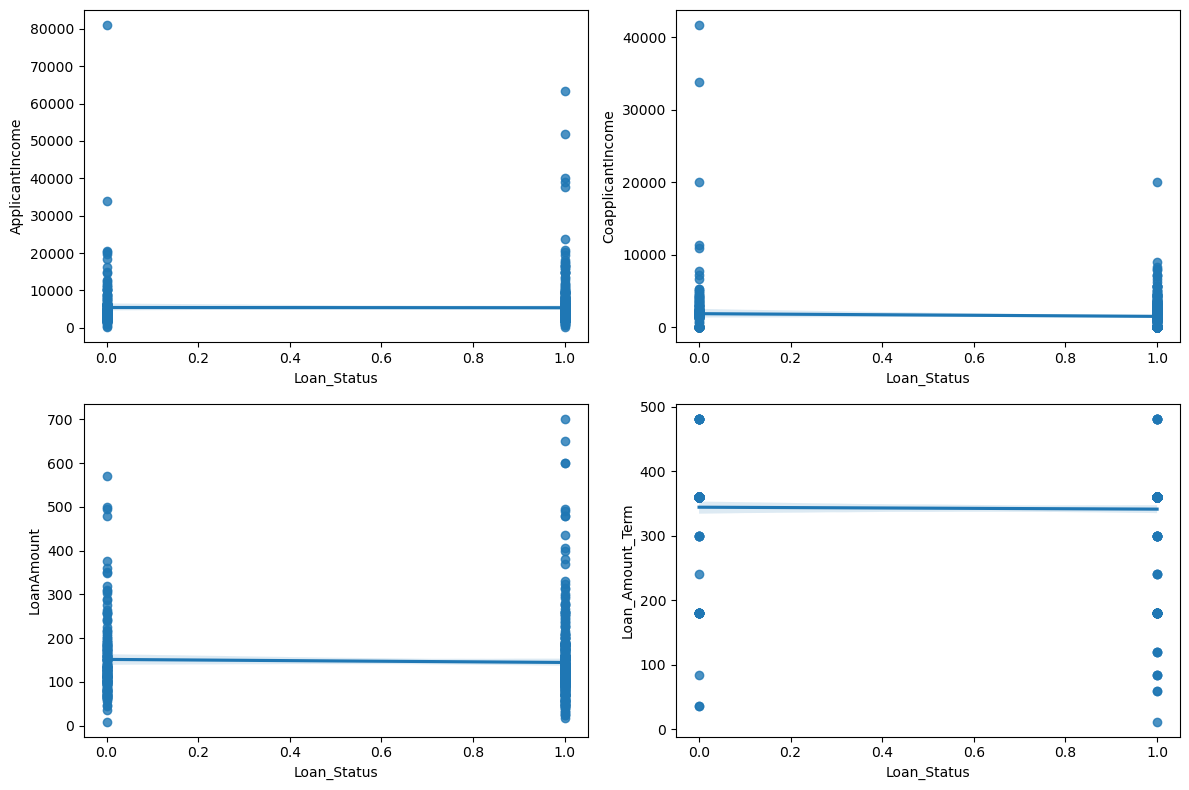

In [23]:
##Numerical-category
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axes.ravel()):
    sns.regplot(y=train_data[numerical[i]], x=train_data['Loan_Status'], ax=ax)
plt.tight_layout()

In [24]:
#hypothesis testing by t_test
def TwoSampT(X1, X2, sd1, sd2, n1, n2):

    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [25]:
def Bivariate_cont_cat(data, cont, cat, category):
    #creating 2 samples
    x1 = data[cont][data[cat]==category]
    x2 = data[cont][~(data[cat]==category)]

    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)


    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

    #plotting
    plt.figure(figsize = (15,6), dpi=140)

    #barplot
    plt.subplot(1,2,1)
    # sns.barplot(x=[str(category),'not {}'.format(category)], y=[m1, m2])
    sns.barplot(x=cat, y=cont, data=data, ci=None)
    plt.ylabel(f'mean {cont}')
    plt.xlabel(cat)
    plt.title(f't-test p-value = {t_p_val} \n {table}')

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')

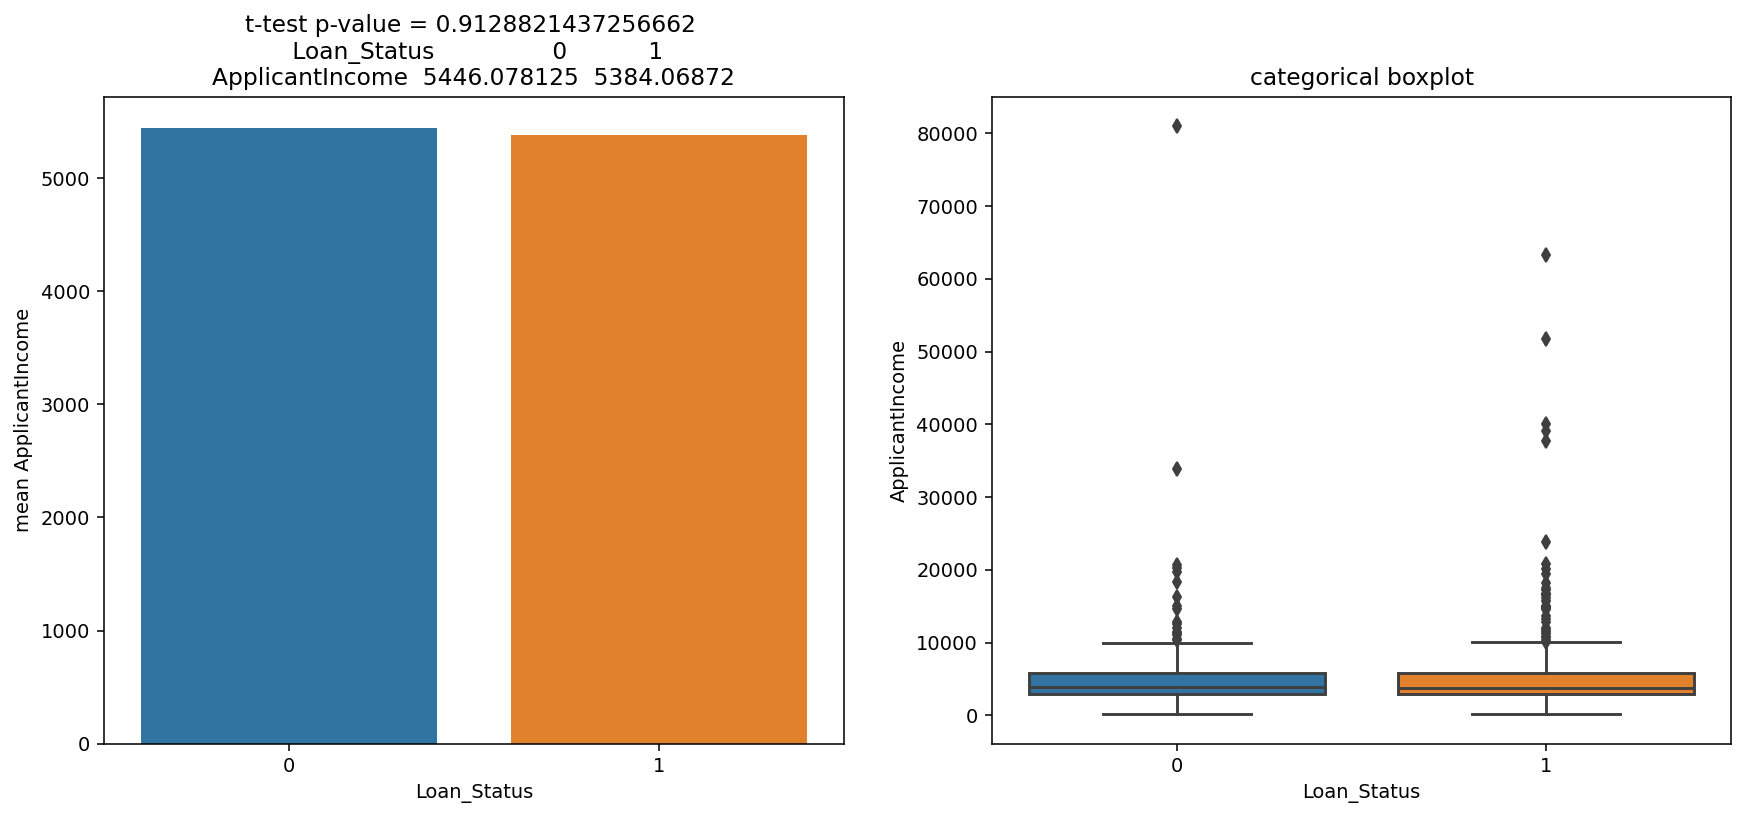

In [26]:

Bivariate_cont_cat(train_data, 'ApplicantIncome', 'Loan_Status', 1)

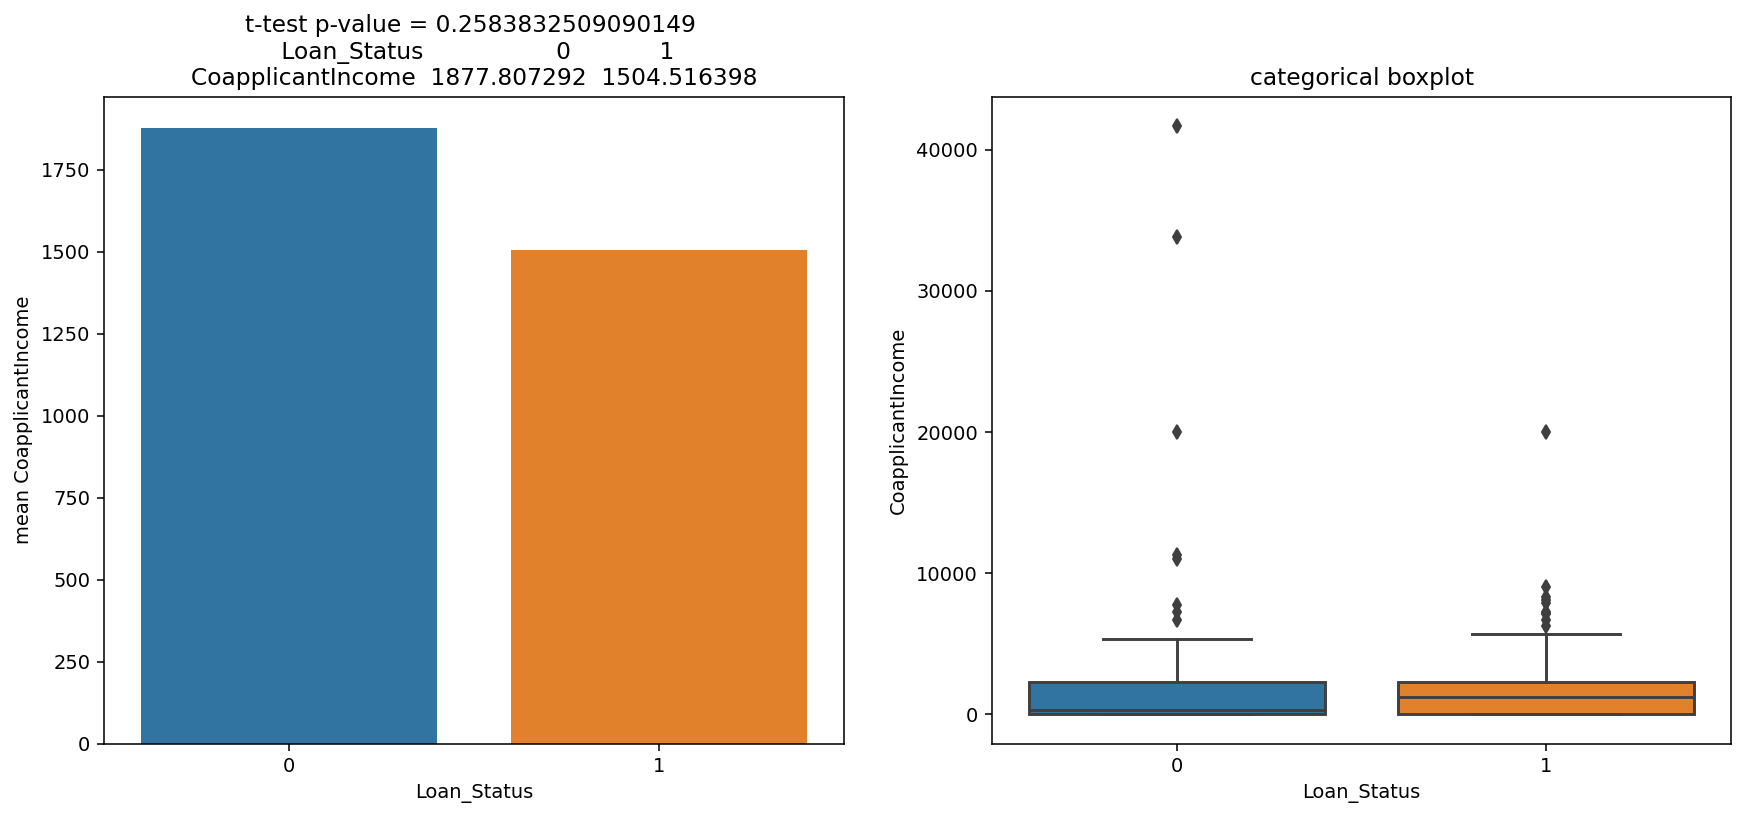

In [27]:
Bivariate_cont_cat(train_data, 'CoapplicantIncome', 'Loan_Status', 1)

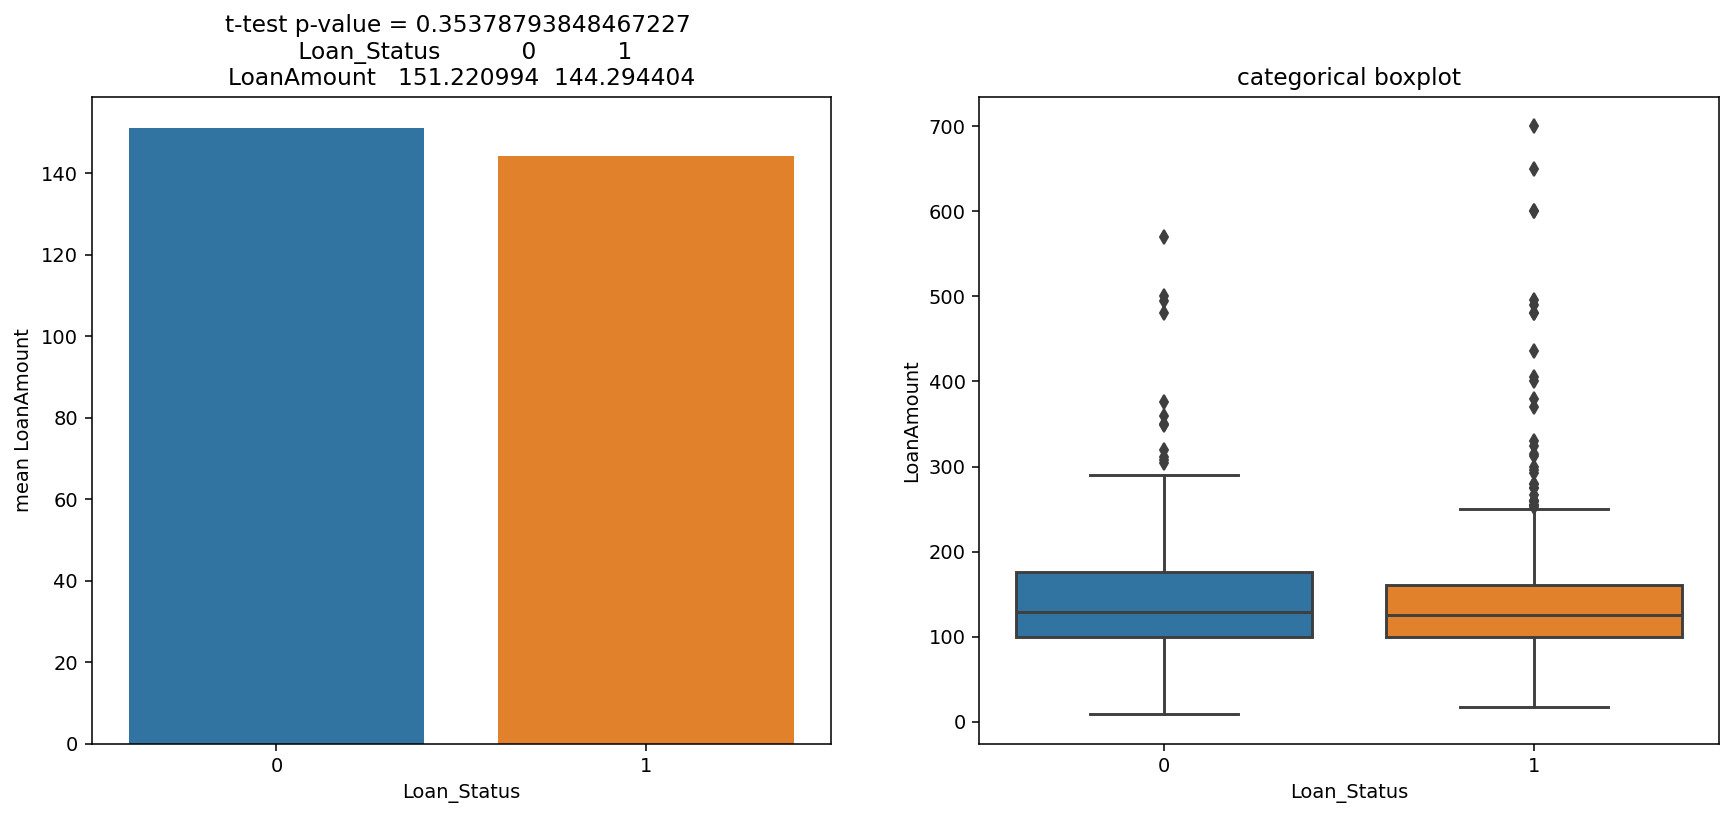

In [28]:
Bivariate_cont_cat(train_data, 'LoanAmount', 'Loan_Status', 1)

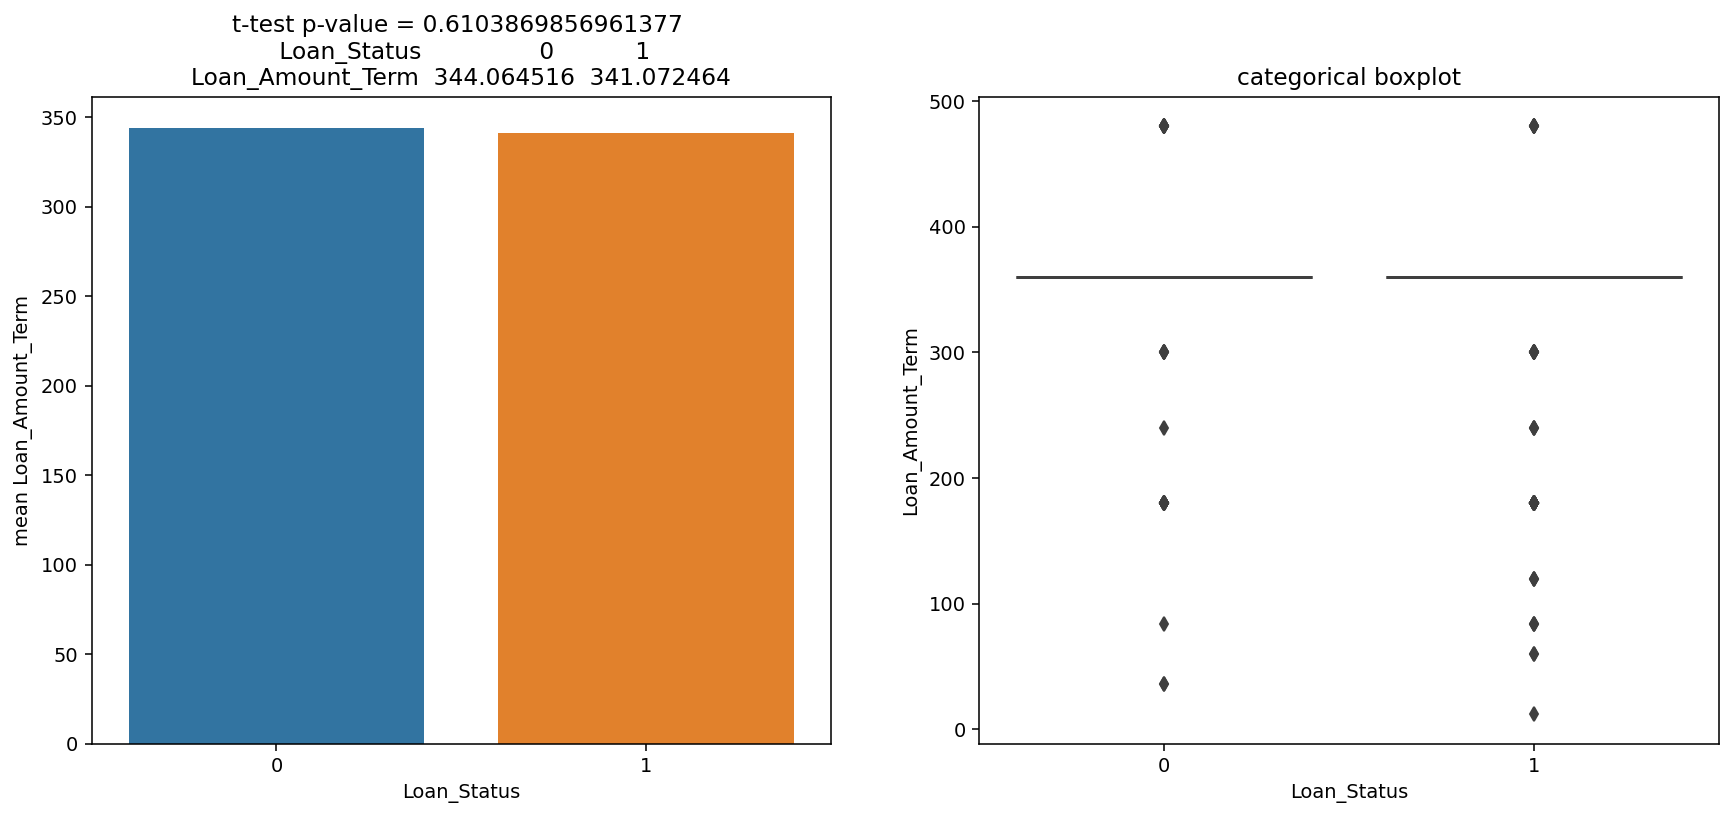

In [29]:
Bivariate_cont_cat(train_data, 'Loan_Amount_Term', 'Loan_Status', 1)

In [30]:
##catergory and category
def BVA_categorical_plot(data, tar, cat):

    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))

In [31]:
train_data['Loan_Status']=train_data['Loan_Status'].astype("str")



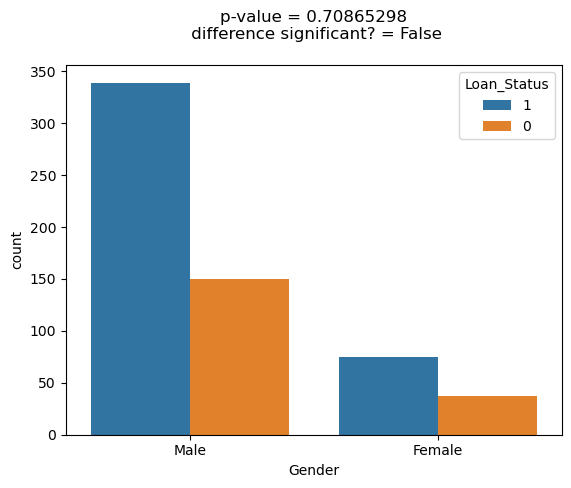

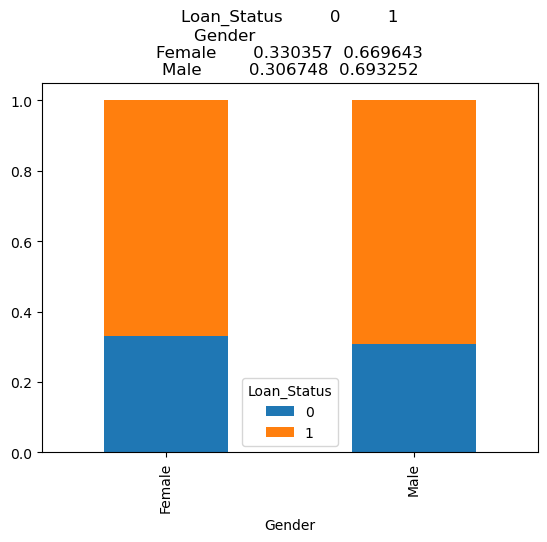

In [32]:
BVA_categorical_plot(train_data , 'Loan_Status', 'Gender')

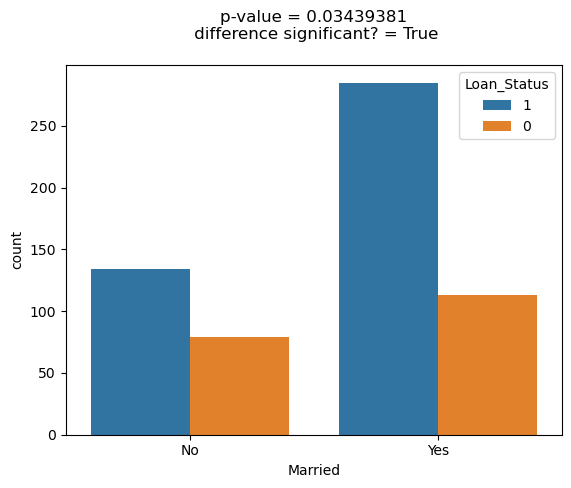

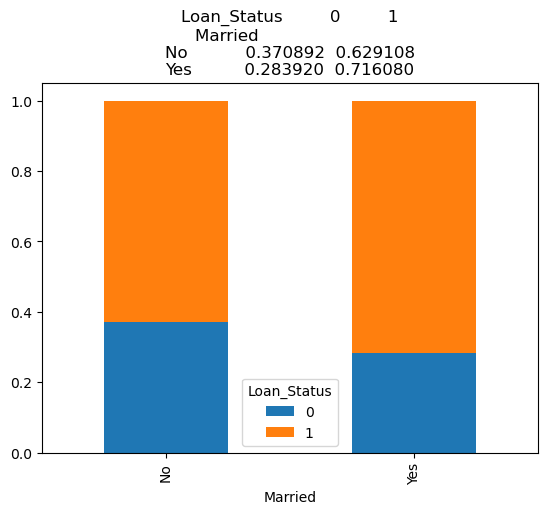

In [33]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Married')

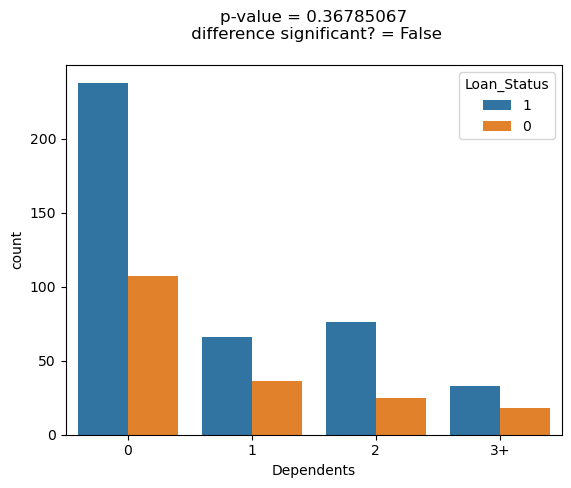

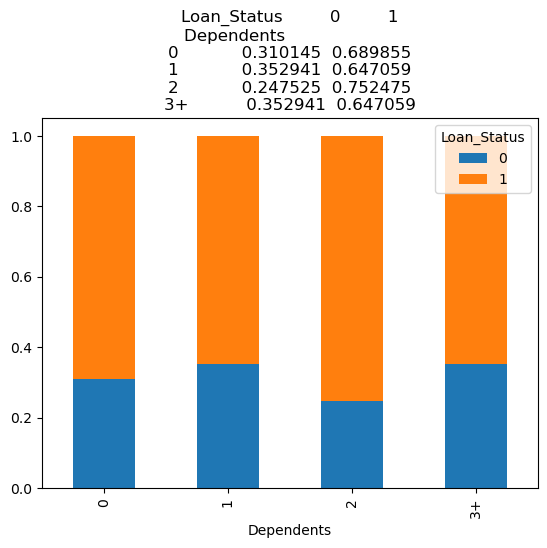

In [34]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Dependents')

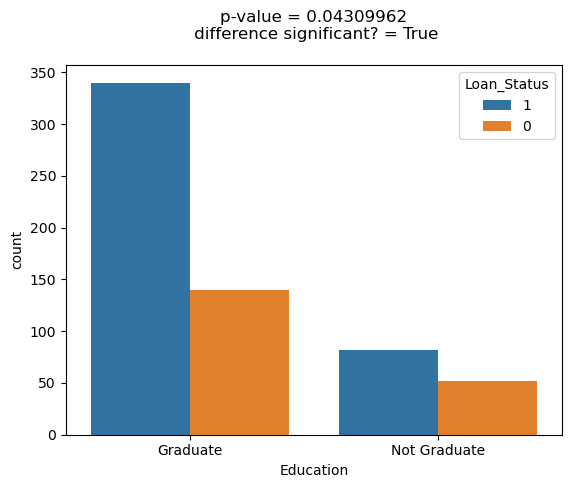

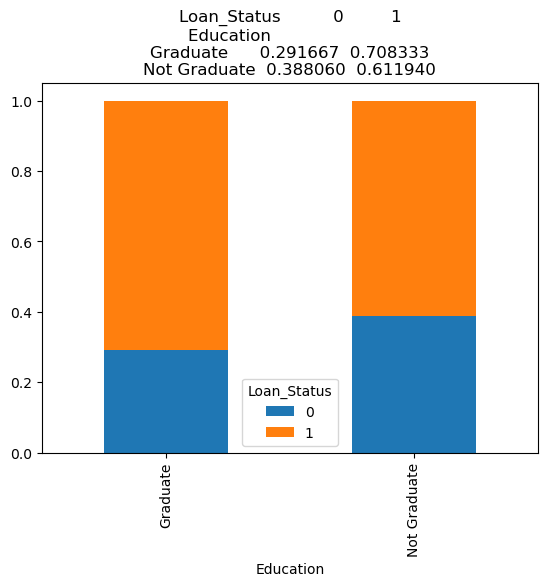

In [35]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Education')

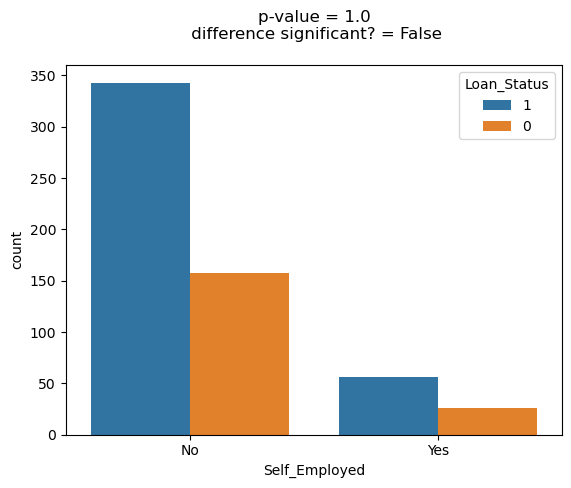

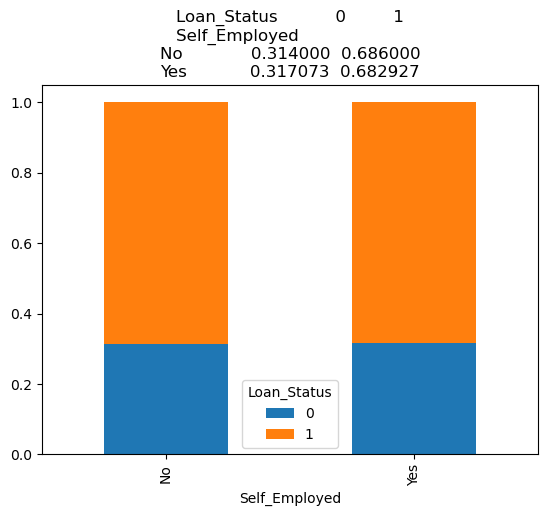

In [36]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Self_Employed')

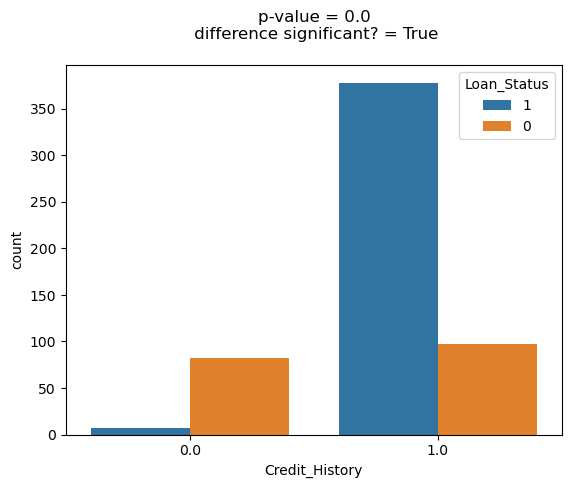

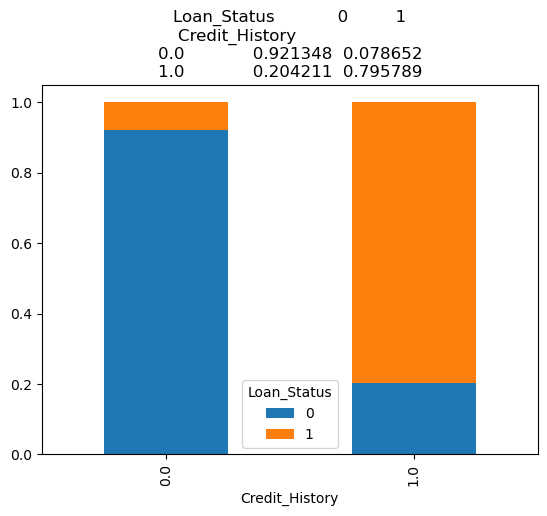

In [37]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Credit_History')

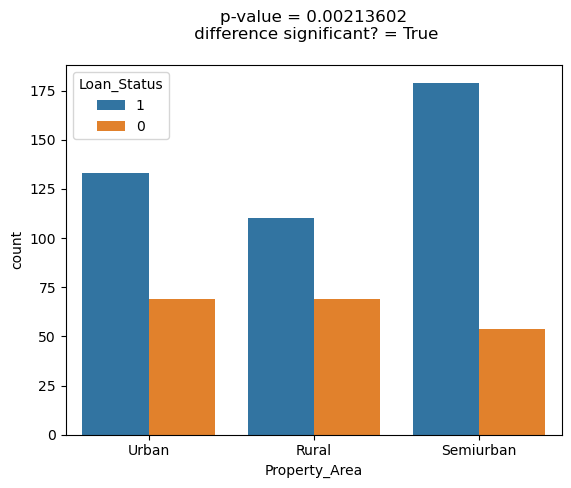

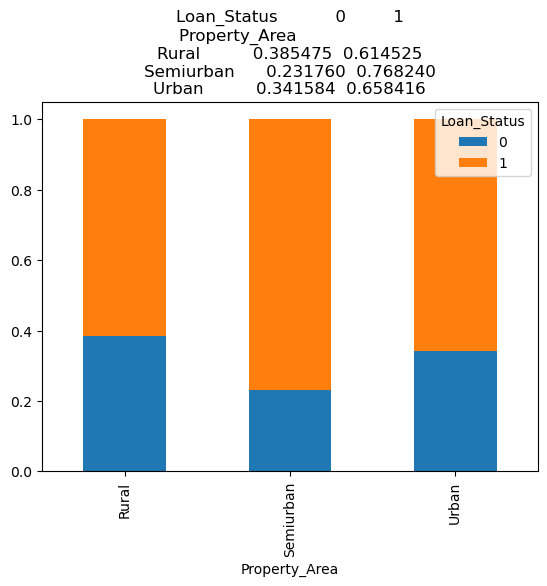

In [38]:
BVA_categorical_plot(train_data, 'Loan_Status', 'Property_Area')

In [39]:
train_data['Loan_Status']=train_data['Loan_Status'].astype("int64")



In [40]:
##Numerical-Numerical
Numerical=train_data.select_dtypes(include=["int64","float64"])

In [41]:
Numerical.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


## Multi-variant analysis


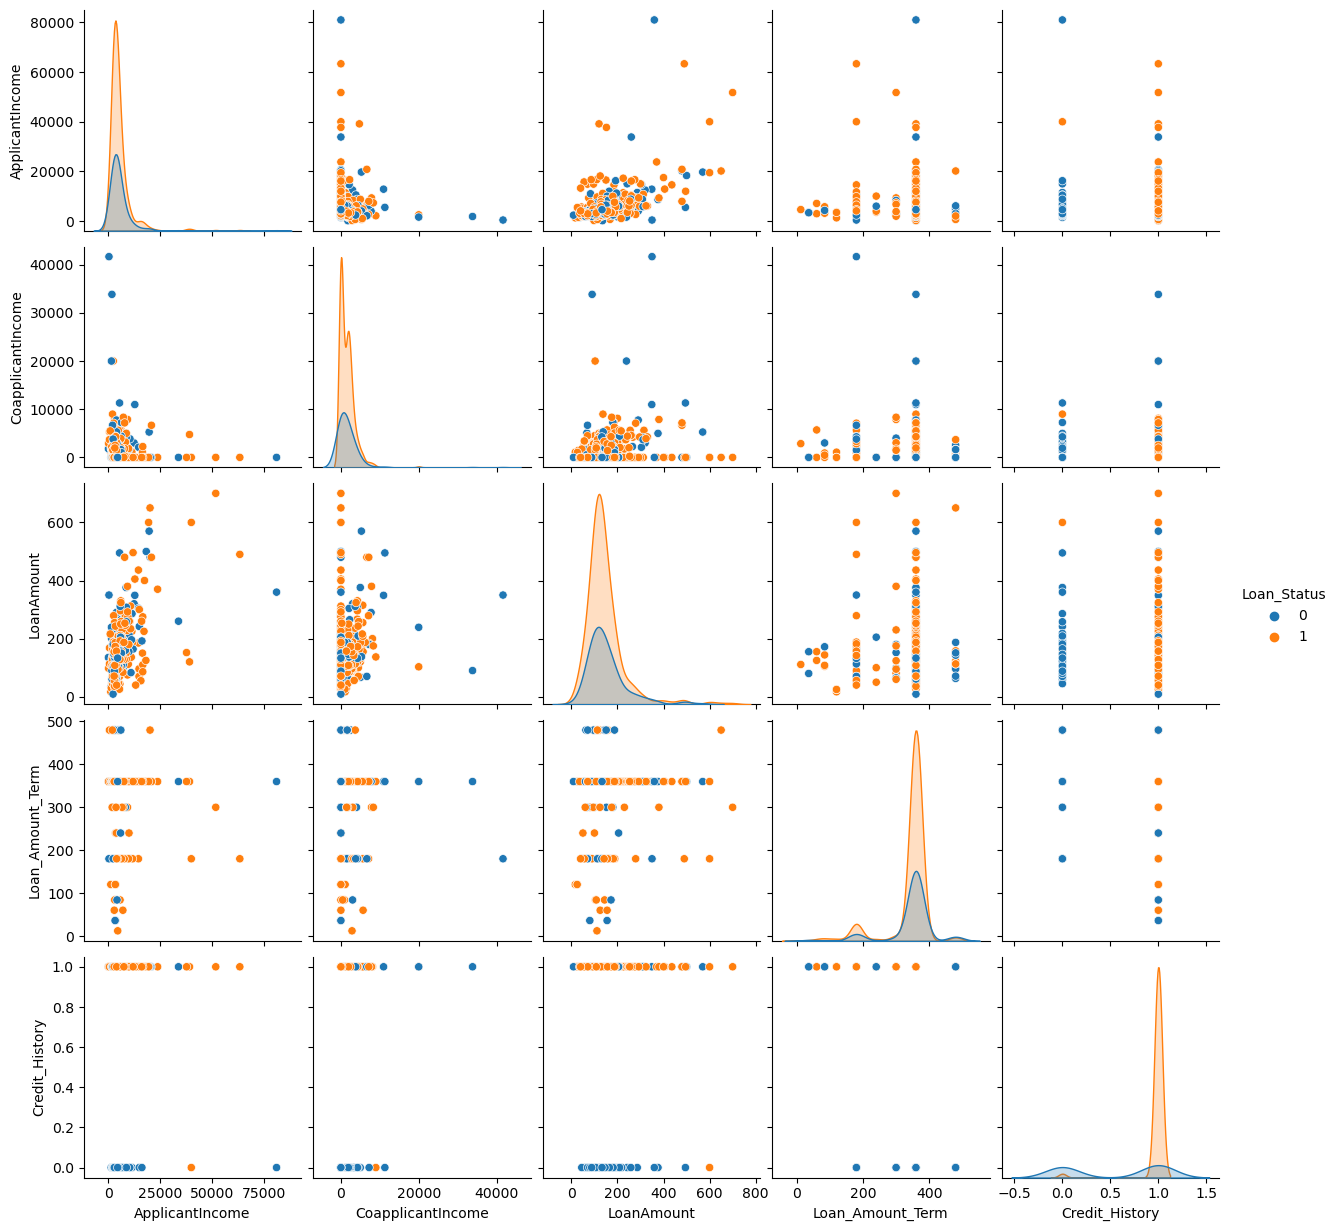

In [43]:
sns.pairplot(train_data.iloc[:, 5:], hue='Loan_Status')

In [44]:
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [45]:
category

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [46]:
from itertools import product

In [47]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cat_cont(df, categorical_features, continuous_features):
    eta_corr = []
    for pair in product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [48]:
cat_cont_corr = cat_cont(train_data, category, numerical)

In [49]:
cat_cont_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.050672,0.083658,0.103532,0.075638
Married,0.051304,0.077726,0.152096,0.104416
Dependents,0.168726,0.048789,0.189647,0.131139
Education,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.129354,0.009226,0.122029,0.036673
Credit_History,0.014476,0.001664,0.008037,0.001440
Property_Area,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.004710,0.059187,0.038242,0.021566


In [50]:
import scipy as sp

In [51]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [52]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [53]:
cat_cat_corr = cat_cat(train_data, category)

In [54]:
cat_cat_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205


In [55]:
pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566


In [56]:
pd.concat([cat_cont_corr, train_data.loc[:, numerical].corr()])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.050672,0.083658,0.103532,0.075638
Married,0.051304,0.077726,0.152096,0.104416
Dependents,0.168726,0.048789,0.189647,0.131139
Education,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.129354,0.009226,0.122029,0.036673
Credit_History,0.014476,0.001664,0.008037,0.001440
Property_Area,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878


In [57]:
all_corr = pd.concat([pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True), train_data.loc[:, numerical].corr()])

In [58]:
all_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.116605,1.000000,0.188619,-0.059878


In [59]:
cat_cont_corr.T

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
ApplicantIncome,0.050672,0.051304,0.168726,0.140760,0.129354,0.014476,0.017427,0.004710
CoapplicantIncome,0.083658,0.077726,0.048789,0.062290,0.009226,0.001664,0.028671,0.059187
LoanAmount,0.103532,0.152096,0.189647,0.175369,0.122029,0.008037,0.047818,0.038242
Loan_Amount_Term,0.075638,0.104416,0.131139,0.080358,0.036673,0.001440,0.100034,0.021566


In [60]:
all_corr.update(cat_cont_corr.T)

In [61]:
all_corr

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,0.994504,0.363110,0.166717,0.016721,0.000000,0.000000,0.100240,0.000000,0.050672,0.083658,0.103532,0.075638
Married,0.363110,0.996390,0.363311,0.000000,0.000000,0.000000,0.000000,0.075459,0.051304,0.077726,0.152096,0.104416
Dependents,0.166717,0.363311,1.000000,0.000000,0.074534,0.000000,0.029845,0.016012,0.168726,0.048789,0.189647,0.131139
Education,0.016721,0.000000,0.000000,0.995219,0.000000,0.063178,0.052455,0.070997,0.140760,0.062290,0.175369,0.080358
Self_Employed,0.000000,0.000000,0.074534,0.000000,0.992890,0.000000,0.000000,0.000000,0.129354,0.009226,0.122029,0.036673
Credit_History,0.000000,0.000000,0.000000,0.063178,0.000000,0.993317,0.000000,0.555349,0.014476,0.001664,0.008037,0.001440
Property_Area,0.100240,0.000000,0.029845,0.052455,0.000000,0.000000,1.000000,0.129590,0.017427,0.028671,0.047818,0.100034
Loan_Status,0.000000,0.075459,0.016012,0.070997,0.000000,0.555349,0.129590,0.996205,0.004710,0.059187,0.038242,0.021566
ApplicantIncome,0.050672,0.051304,0.168726,0.140760,0.129354,0.014476,0.017427,0.004710,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,0.083658,0.077726,0.048789,0.062290,0.009226,0.001664,0.028671,0.059187,-0.116605,1.000000,0.188619,-0.059878


<Axes: >

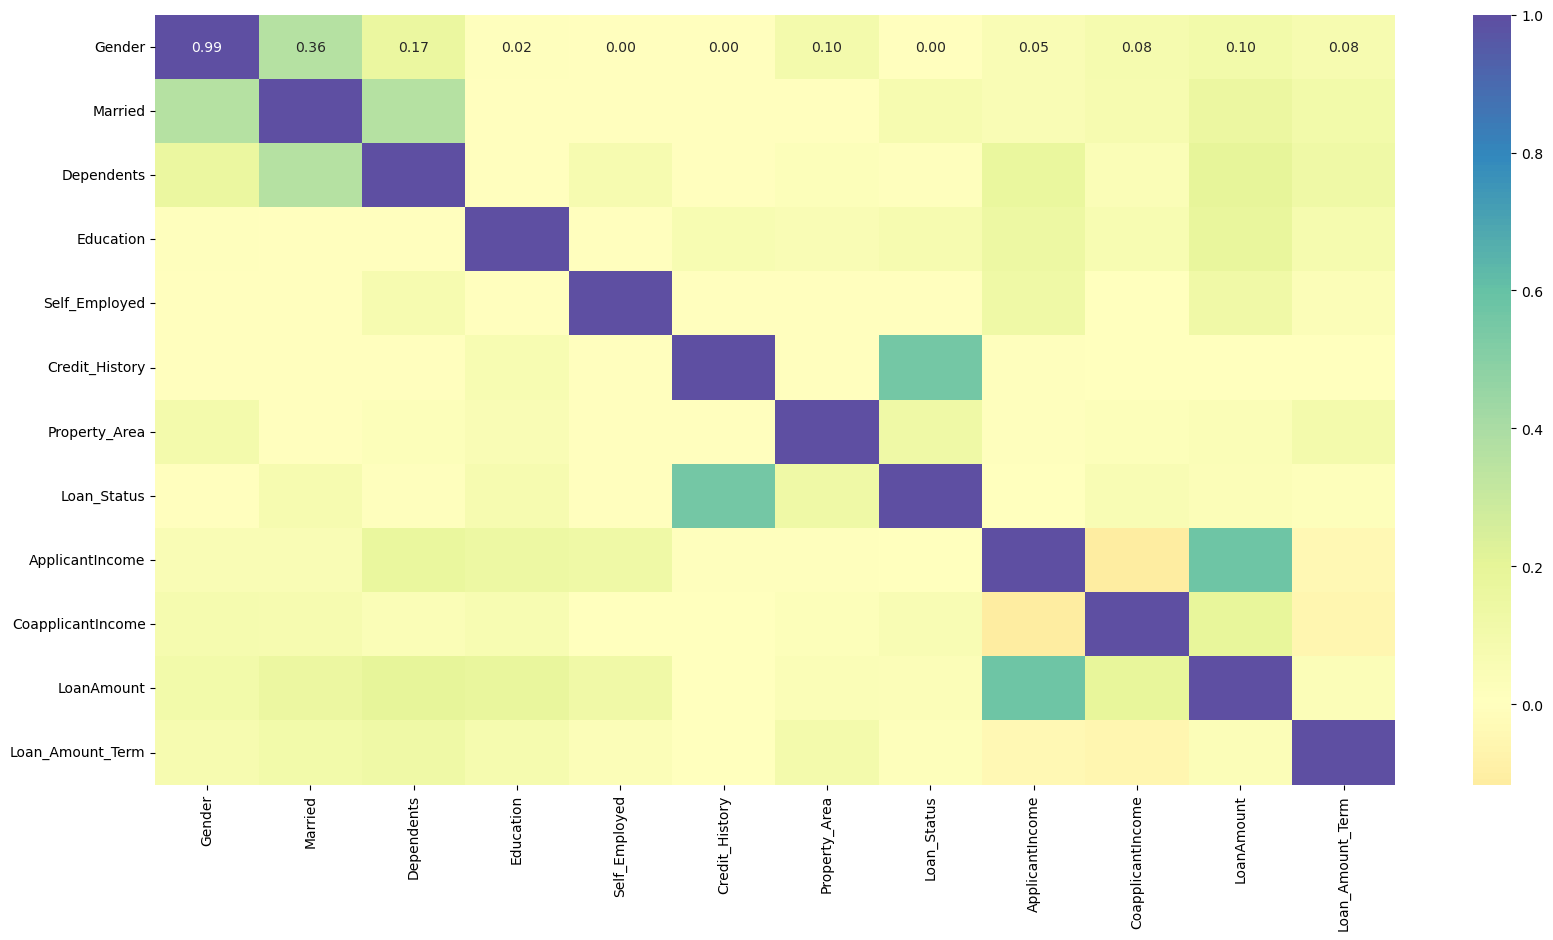

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(all_corr, annot=True, cmap='Spectral', center=0, fmt='.2f')